In [1]:
import pandas as pd
import numpy as np
from word2number import w2n
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy.stats as stats
import warnings
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [2]:
df_activity_clean = pd.read_csv("df_activity_clean.csv")
df_loyalty_clean = pd.read_csv("df_loyalty_clean.csv")
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
df_activity_clean.sample(5)

,LoyaltyNumber,Year,Month,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
28493,725835,2017,2,11,0,11,3080,308.0,0,0
39969,442251,2017,3,0,0,0,0,0.0,0,0
311606,575612,2018,7,11,6,17,4148,414.0,0,0
151122,989746,2017,9,0,0,0,0,0.0,0,0
368056,891046,2018,10,13,0,13,2392,239.0,0,0


In [4]:
df_loyalty_clean.sample(5)

,LoyaltyNumber,Country,Province,City,PostalCode,Gender,Education,Salary,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth
6639,708458,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,75781.0,Single,Star,4571.61,2018 Promotion,2018,2
10070,153656,Canada,Alberta,Banff,T4V 1D4,Female,College,Unknown,Married,Star,2287.60,Standard,2016,12
13906,251436,Canada,New Brunswick,Fredericton,E3B 2H2,Female,College,Unknown,Married,Star,5714.25,Standard,2017,3
14497,849705,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,61020.0,Married,Star,7255.58,Standard,2013,12
11062,747571,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,49371.0,Married,Star,2556.61,Standard,2013,1


In [5]:
df_clientes= df_activity_clean.merge(df_loyalty_clean, on='LoyaltyNumber', how='inner')

In [6]:
#Ordenamos las columnas por orden alfabético:

df_clientes = df_clientes[sorted(df_clientes.columns)]

In [7]:
df_clientes.sample(5)

,CLV,City,Country,Distance,DollarCostPointsRedeemed,Education,EnrollmentMonth,EnrollmentType,EnrollmentYear,FlightsBooked,FlightswithCompanions,Gender,LoyaltyCard,LoyaltyNumber,MaritalStatus,Month,PointsAccumulated,PointsRedeemed,PostalCode,Province,Salary,TotalFlights,Year
169580,16138.42,Dawson Creek,Canada,0,0,Bachelor,12,Standard,2014,0,0,Female,Aurora,178459,Married,11,0.0,0,U5I 4F1,British Columbia,89745.0,0,2017
160967,4369.72,Toronto,Canada,0,0,Bachelor,10,Standard,2013,0,0,Female,Nova,615617,Married,10,0.0,0,M8Y 4K8,Ontario,96663.0,0,2017
38279,8852.69,Toronto,Canada,3732,39,Bachelor,11,Standard,2014,3,3,Female,Nova,734752,Married,5,373.0,484,M2M 7K8,Ontario,81643.0,6,2017
41822,2364.43,Dawson Creek,Canada,543,0,Bachelor,8,Standard,2013,3,0,Male,Star,541178,Single,3,54.0,0,U5I 4F1,British Columbia,65760.0,3,2017
25810,9546.82,Fredericton,Canada,0,0,High School or Below,4,2018 Promotion,2018,0,0,Male,Nova,582674,Married,2,0.0,0,E3B 2H2,New Brunswick,32785.0,0,2017


In [8]:
df_clientes.dtypes

CLV                         float64
City                         object
Country                      object
Distance                      int64
DollarCostPointsRedeemed      int64
Education                    object
EnrollmentMonth               int64
EnrollmentType               object
EnrollmentYear                int64
FlightsBooked                 int64
FlightswithCompanions         int64
Gender                       object
LoyaltyCard                  object
LoyaltyNumber                 int64
MaritalStatus                object
Month                         int64
PointsAccumulated           float64
PointsRedeemed                int64
PostalCode                   object
Province                     object
Salary                       object
TotalFlights                  int64
Year                          int64
dtype: object

# **FASE 2**

#### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

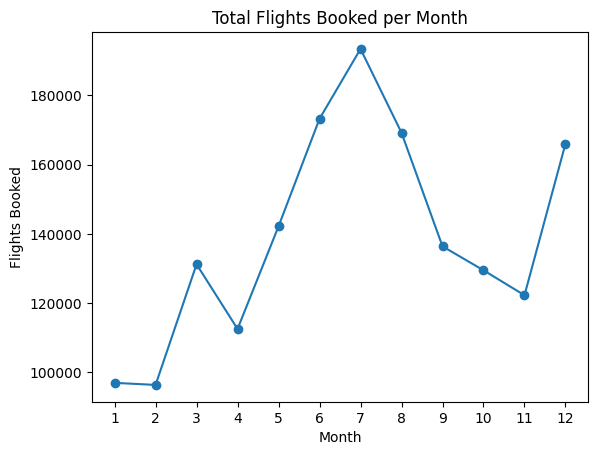

In [9]:
#GRAFICO DE LINEAS

df_clientes.groupby('Month')['FlightsBooked'].sum().plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Flights Booked')
plt.title('Total Flights Booked per Month')
plt.xticks(range(1,13))
plt.show()


*CONCLUSION*

Podemos ver que los meses en los que mas se reservan vuelos son los meses de veranos (junio/Julio/Agosto) y tenemos otro pico en el mes de navidad (Diciembre)

#### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

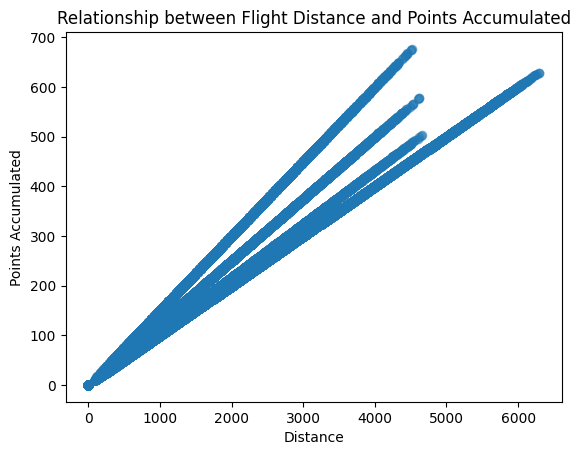

In [10]:

plt.scatter(df_clientes['Distance'], df_clientes['PointsAccumulated'], alpha=0.5)
plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.title('Relationship between Flight Distance and Points Accumulated')
plt.show()


*CONCLUSION*

Existe una relación entre la distancia de los vuelos y los puntos acumulados: a mayor distancia, mayor número de puntos. Sin embargo, se observa un pico entre los 600 y 700 puntos para vuelos de 4000 a 5000 km, lo que podría deberse a ofertas especiales de puntos o vuelos nacionales largos.

#### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

C:\Users\elena\AppData\Local\Temp\ipykernel_132\2794220638.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prov_counts.values, y=prov_counts.index, palette="Blues_d")


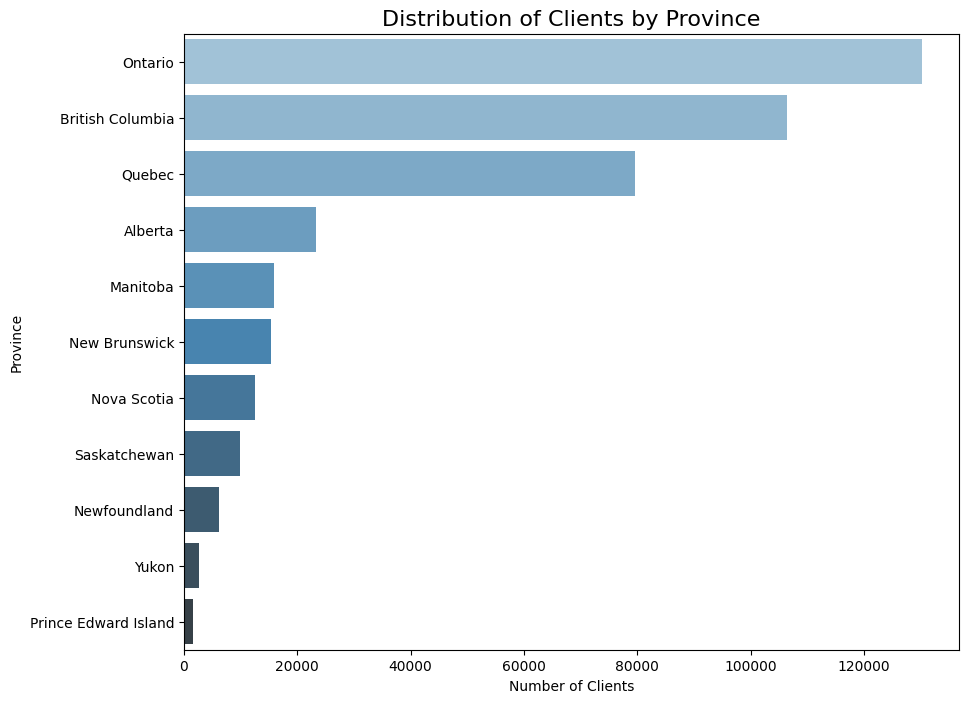

In [11]:
#OPCION 1
prov_counts = df_clientes['Province'].value_counts()


plt.figure(figsize=(10,8))
sns.barplot(x=prov_counts.values, y=prov_counts.index, palette="Blues_d")
plt.title('Distribution of Clients by Province', fontsize=16)
plt.xlabel('Number of Clients')
plt.ylabel('Province')
plt.show()


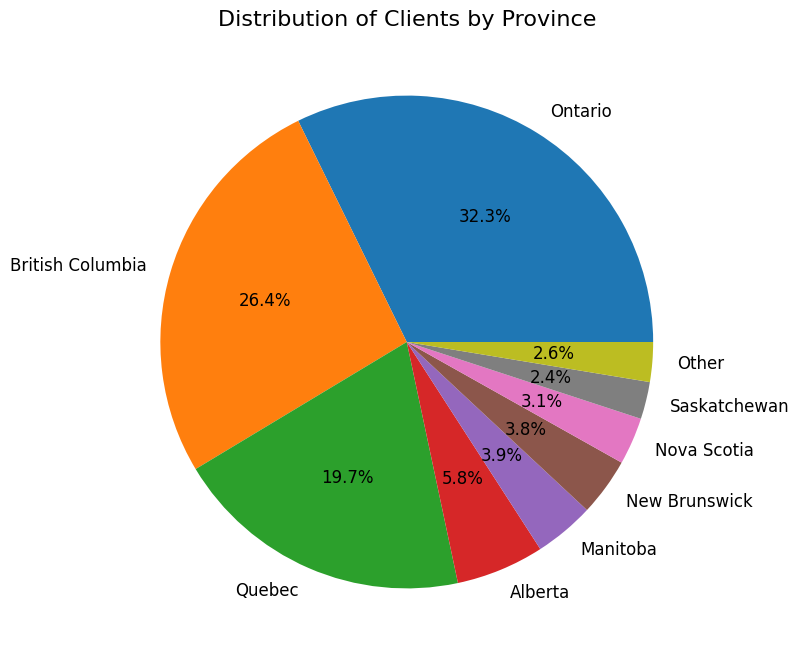

In [12]:
#OPCION 2

prov_counts = df_clientes['Province'].value_counts()

top_prov = prov_counts[:8]               
others = prov_counts[8:].sum()          #Ponemos las tres ultimas provincias para mejor visualizacion de la gráfica y se etiquetan como "Others"
top_prov['Other'] = others

plt.figure(figsize=(8,8))
plt.pie(
    top_prov,
    labels=top_prov.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
plt.title('Distribution of Clients by Province', fontsize=16)
plt.show()



*CONCLUSION*

La mayoría de los clientes se concentra en las provincias con grandes ciudades: Ontario, que incluye Toronto, Ottawa y Mississauga; seguida por Columbia Británica (Vancouver); y Quebec (Montreal). Esto se debe a que en las ciudades más grandes hay más población con acceso a vuelos, aumentando el número de clientes.

#### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

C:\Users\elena\AppData\Local\Temp\ipykernel_132\3817409243.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education', y='Salary', data=salary_by_edu, palette='Blues_d', ci=None)
C:\Users\elena\AppData\Local\Temp\ipykernel_132\3817409243.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Salary', data=salary_by_edu, palette='Blues_d', ci=None)


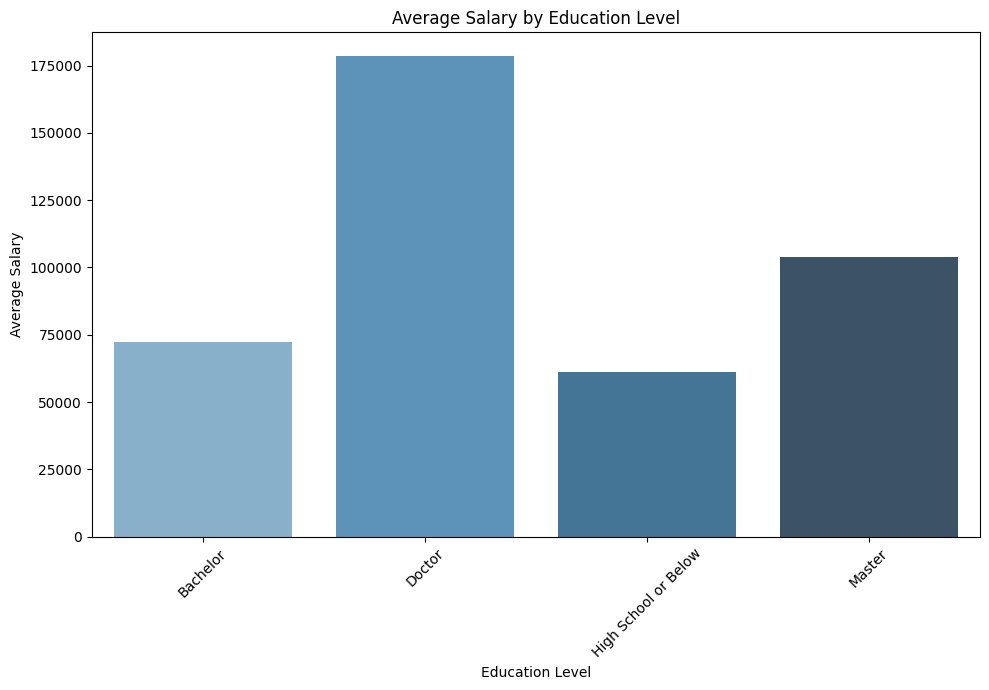

In [13]:
#no sé en que momento la columna "Salary" dejó de ser numerica, la cambiamos

df_clientes['Salary'] = pd.to_numeric(df_clientes['Salary'], errors='coerce')

salary_by_edu = df_clientes.groupby('Education')['Salary'].mean().reset_index()

salary_by_edu = salary_by_edu[salary_by_edu['Education'] != 'College']

plt.figure(figsize=(10,7))
sns.barplot(x='Education', y='Salary', data=salary_by_edu, palette='Blues_d', ci=None)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Hemos detectado una categoría adicional en “Education”. Sospecho que el grupo “College” aparece con salario cero porque corresponde a universitarios que aún no cuentan con empleo. Vamos a comprobarlo.

In [14]:
total_college = df_clientes[df_clientes['Education'] == 'College'].shape[0]

unknown_college = df_clientes[(df_clientes['Education'] == 'College') & (df_clientes['Salary'].isna())]

porcentaje_unknown = len(unknown_college) / total_college * 100

print(f"Porcentaje de College con salario desconocido: {porcentaje_unknown} %")
()

Porcentaje de College con salario desconocido: 100.0 %


()

*CONCLUSION*

A mayor nivel educativo, mayor es el salario promedio, siguiendo la tendencia habitual en muchos países desarrollados, donde la educación superior suele abrir puertas a mejores oportunidades y remuneraciones. La categoría “College” no aparece en la gráfica porque la mayoría de estos clientes todavía están estudiando y no cuentan con ingresos registrados.

#### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

In [15]:
df_clientes['LoyaltyCard'].value_counts()

LoyaltyCard
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

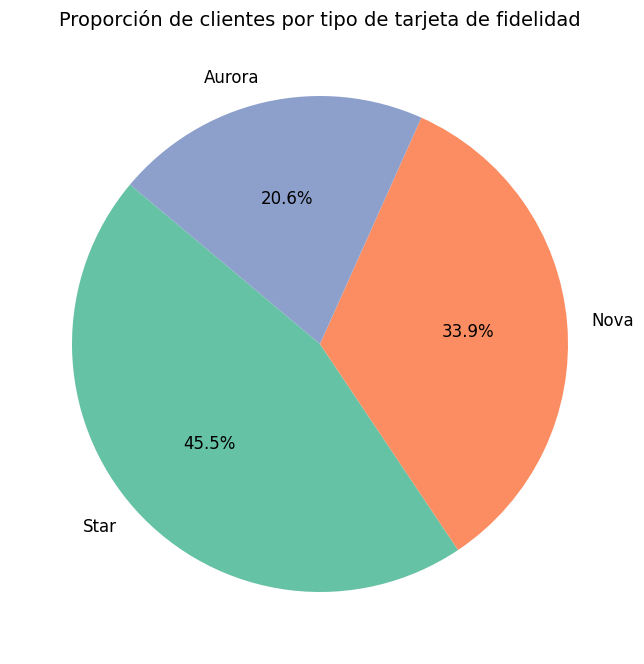

In [16]:
card_counts = df_clientes['LoyaltyCard'].value_counts()

plt.figure(figsize=(8,12))
plt.pie(
    card_counts,
    labels=card_counts.index,
    autopct='%1.1f%%',       # mostrar porcentaje de cada tipo
    startangle=140,
    colors=['#66c2a5', '#fc8d62', '#8da0cb'],  # colores bonitos y diferenciados
    textprops={'fontsize': 12}
)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad', fontsize=14)
plt.show()

*CONCLUSION*

En el programa de fidelidad se observan tres niveles de tarjeta: Aurora, Nova y Star. La tarjeta Star concentra el 45.4% de los clientes, siendo la más popular y representando el nivel más alto de participación. La tarjeta Nova agrupa al 33.9% de los usuarios, mientras que Aurora representa al 20.7%, el segmento más reducido.
Esta distribución indica que la mayoría de los clientes se encuentra en los niveles superiores del programa, lo que sugiere un alto grado de fidelización y participación activa dentro de la compañía.

#### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

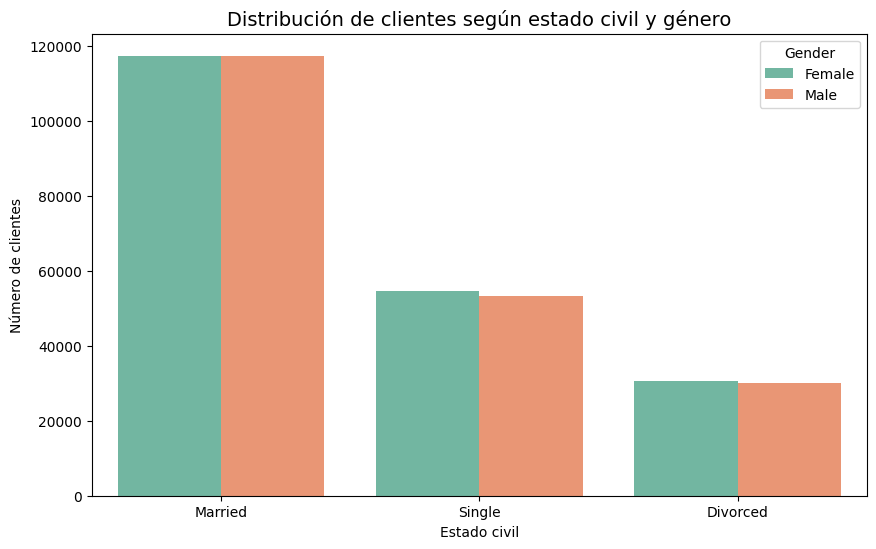

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df_clientes,
    x='MaritalStatus',
    hue='Gender',
    palette='Set2'
)
plt.title('Distribución de clientes según estado civil y género', fontsize=14)
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.show()

In [18]:
porciento_marital = df_clientes['MaritalStatus'].value_counts(normalize=True) * 100
porciento_marital = porciento_marital.round(2)

In [19]:
print(f'Porcentaje por Estado Marital es:/n {porciento_marital}')

Porcentaje por Estado Marital es:/n MaritalStatus
Married     58.16
Single      26.79
Divorced    15.05
Name: proportion, dtype: float64


*CONCLUSION*

La mayoría de los clientes son hombres y mujeres casados (58,13%), seguidos por los solteros (26,79%), siendo los divorciados el grupo minoritario (15,08%).Esto indica que la compañía tiene una base de clientes predominantemente casados, y que la distribución por género es bastante equilibrada dentro de cada estado civil.

## 

# ____BONUS____

Utilizando el conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Tendremos en mente que los datos que tenemos son solo una muestra de una población. Para ello, los pasos que deberás seguir son: 

1. **Preparación de Datos:**
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [20]:
#Hago una copia del documento donde solo esten estas columnas, hacemos print para comprobar y contamos los valores unicos de "EDUCATION"
df_clientes_education = df_clientes[['FlightsBooked', 'Education']].copy()

print(df_clientes_education['Education'].value_counts())


Education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64


2. **Análisis Descriptivo:**
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, mediana, la desviación estándar) del número de vuelos reservados para cada grupo. Aquí, utilizamos estadística descriptiva normal.


In [21]:
#Hacemos una variable para que nos agrupe Media, Mediana, Desviacion tipica y conteo (dredondeamos a 2 decimales)

df_edu_flights = df_clientes_education.groupby('Education')['FlightsBooked'].agg(['mean', 'median', 'std', 'count']).reset_index()

#ordenemos x la media

df_edu_flights = df_edu_flights.sort_values('mean', ascending=True)

#utilizamos el print para ver si lo que nos sale es correcto

print(df_edu_flights)


              Education      mean  median       std   count
0              Bachelor  4.110288     1.0  5.221671  252567
1               College  4.169744     1.0  5.246040  102260
2                Doctor  4.175512     1.0  5.256971   17731
3  High School or Below  4.176209     1.0  5.239267   18915
4                Master  4.200700     1.0  5.213956   12287


In [22]:
#Vamos a aplicar un "DESCRIBE" para completar un poco mas las estadisticas, aunque lo que hemos hecho 
# anteriormente es mas "limpio", el "DESCRIBE" nos va a aportar mas detalles.

describe_edu = df_clientes_education.groupby('Education')['FlightsBooked'].describe()

describe_edu = describe_edu.sort_values('mean', ascending=True)

print(describe_edu)

                         count      mean       std  min  25%  50%  75%   max
Education                                                                   
Bachelor              252567.0  4.110288  5.221671  0.0  0.0  1.0  8.0  21.0
College               102260.0  4.169744  5.246040  0.0  0.0  1.0  8.0  21.0
Doctor                 17731.0  4.175512  5.256971  0.0  0.0  1.0  8.0  21.0
High School or Below   18915.0  4.176209  5.239267  0.0  0.0  1.0  8.0  21.0
Master                 12287.0  4.200700  5.213956  0.0  0.0  1.0  8.0  21.0


De esta manera contariamos con la media (mean), mediana (median), la desviación estandar, minimo (min), maximo (max) y los percentiles 25,50 y 75.

3. **Prueba Estadística:**
Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. Aquí utilizamos estadística inferencial.

In [23]:
df_clientes['Education'].value_counts()

Education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

In [24]:
bachelor = df_clientes[df_clientes['Education'] == 'Bachelor']['FlightsBooked']
college = df_clientes[df_clientes['Education'] == 'College']['FlightsBooked']
hsm = df_clientes[df_clientes['Education'] == 'High School or Below']['FlightsBooked']
doctor = df_clientes[df_clientes['Education'] == 'Doctor']['FlightsBooked']
master = df_clientes[df_clientes['Education'] == 'Master']['FlightsBooked']

In [25]:
warnings.filterwarnings("ignore")

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")


In [26]:
bachelor = df_clientes[df_clientes['Education'] == 'Bachelor']['FlightsBooked']
college = df_clientes[df_clientes['Education'] == 'College']['FlightsBooked']
hsm = df_clientes[df_clientes['Education'] == 'High School or Below']['FlightsBooked']
doctor = df_clientes[df_clientes['Education'] == 'Doctor']['FlightsBooked']
master = df_clientes[df_clientes['Education'] == 'Master']['FlightsBooked']

In [27]:
prueba_hipotesis(bachelor, college)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 12834460862.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [28]:
prueba_hipotesis(bachelor, hsm)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1589)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 2368160009.0000, p-valor: 0.0360
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [29]:
prueba_hipotesis(bachelor, doctor)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1356)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 2223352413.5000, p-valor: 0.0946
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [30]:
prueba_hipotesis(bachelor, master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 1532540228.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [31]:
prueba_hipotesis(college, hsm)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.9502)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 964794671.5000, p-valor: 0.5757
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [32]:
prueba_hipotesis(college, doctor)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.9533)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 905774239.5000, p-valor: 0.8396
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [33]:
prueba_hipotesis(college, master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.7302)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 624388384.5000, p-valor: 0.2384
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [34]:
prueba_hipotesis(hsm, doctor)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.9261)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 167945557.0000, p-valor: 0.7896
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [35]:
prueba_hipotesis(hsm, master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.7433)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 115772018.5000, p-valor: 0.5557
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [36]:
prueba_hipotesis(doctor, master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.8104)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 108361509.0000, p-valor: 0.4139
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



*CONCLUSION*

En general, el nivel educativo "Bachelor" se diferencia de algunos otros grupos en el número de vuelos reservados, pero no hay diferencias significativas entre los demás niveles educativos. Esto indica que el efecto del nivel educativo sobre la cantidad de vuelos reservados es relevante solo para ciertos grupos, mientras que la mayoría de los grupos muestran comportamientos similares.